# House Prices - Advanced Regression Techniques (Kaggle)

Run after following notebooks are run:
1. 01 Data Cleaning

#### Development Ideas
* research how to systematically loop through all relationship graphs
* https://medium.com/@sebastiencallebaut/kaggle-housing-competition-learn-with-a-step-by-step-solution-bdca19cc8eed

In [1]:
### set up libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

pd.options.display.max_rows = 100

In [2]:
### load data (cleaned)
train = pd.read_csv('train_clean.csv')

c:\Users\steph\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


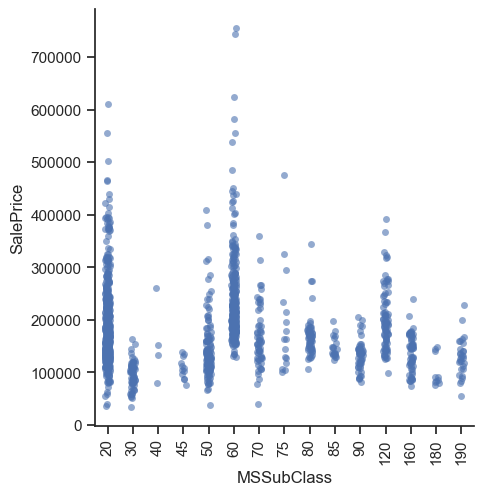

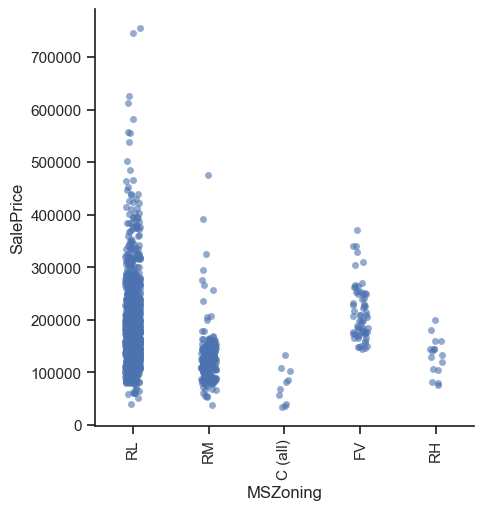

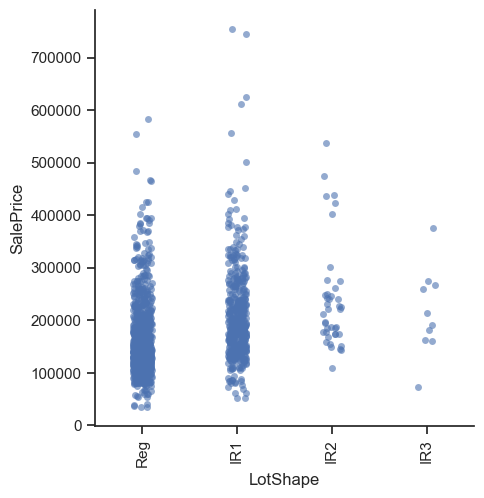

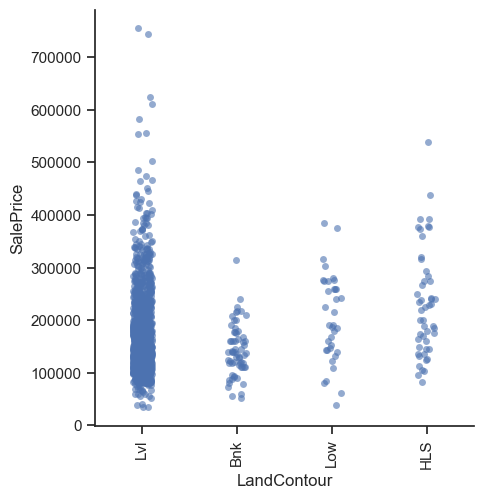

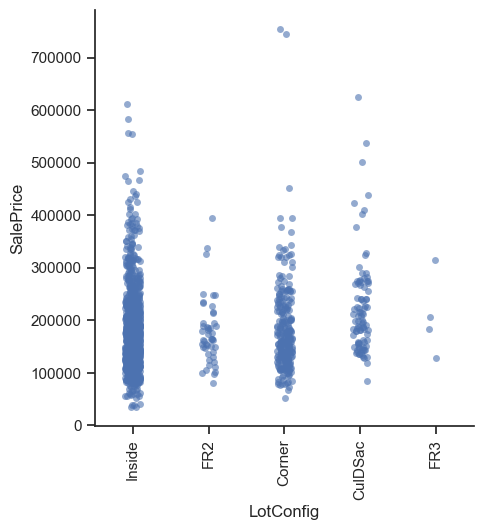

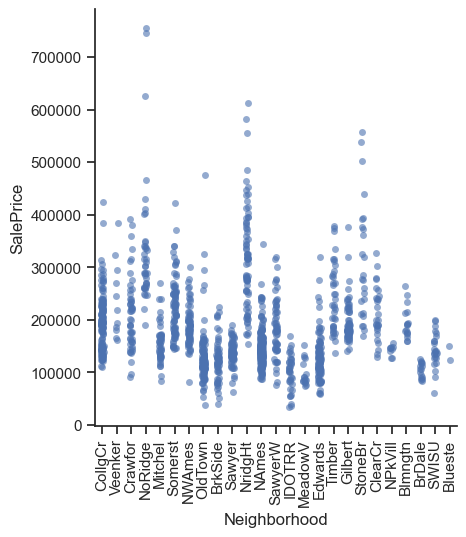

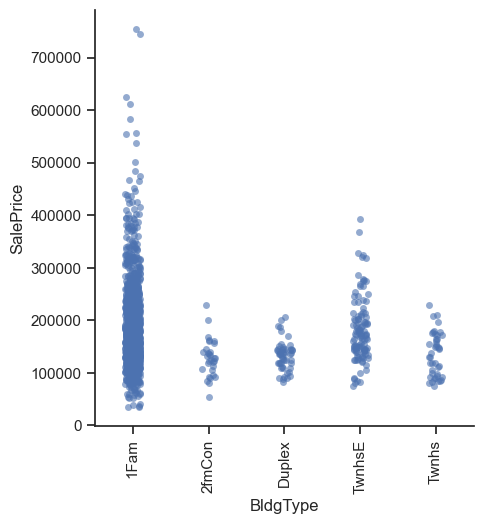

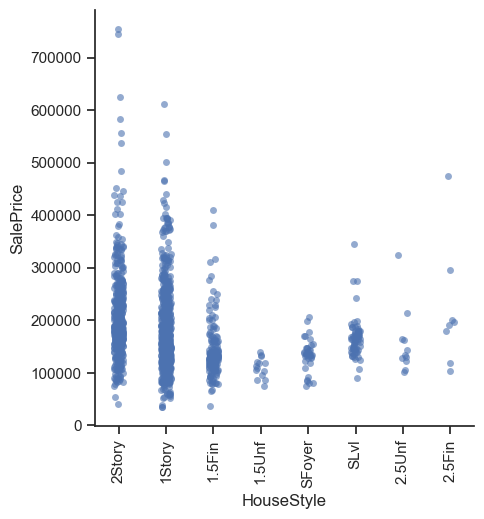

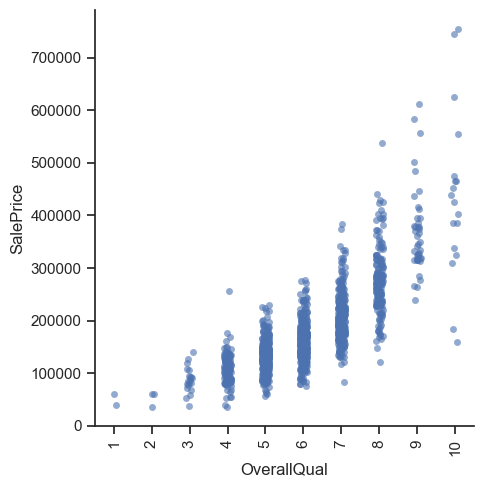

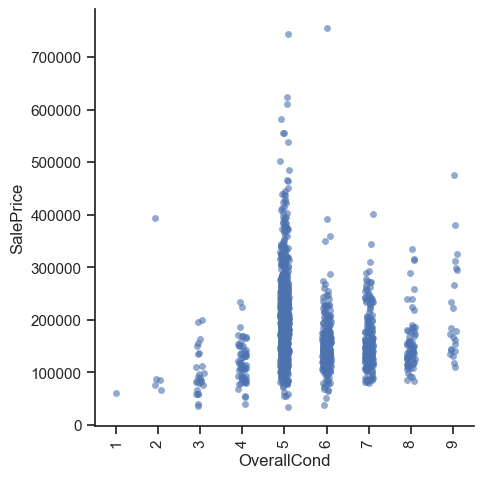

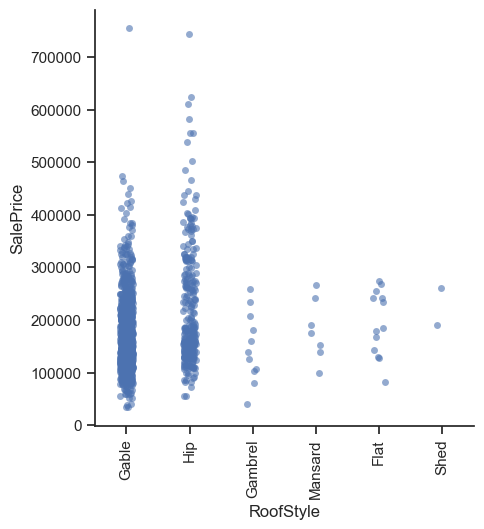

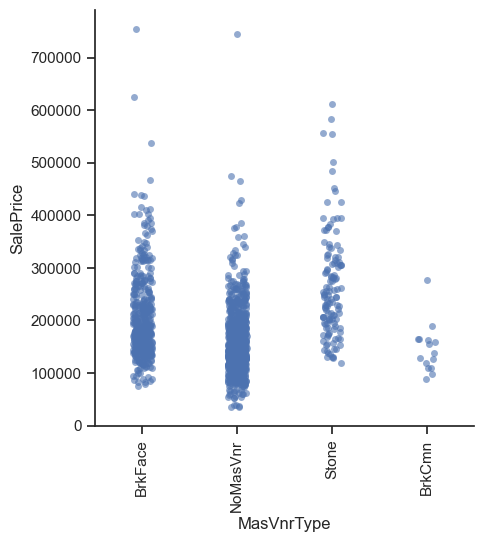

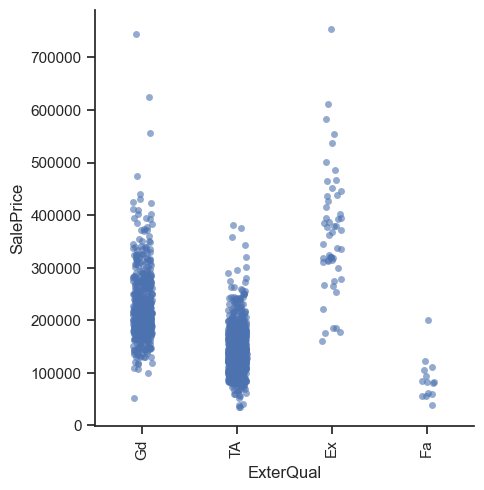

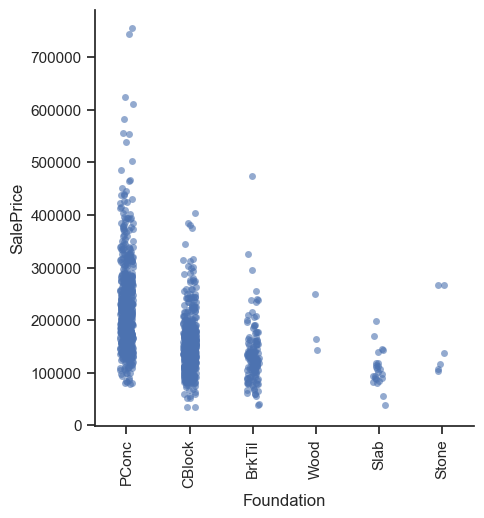

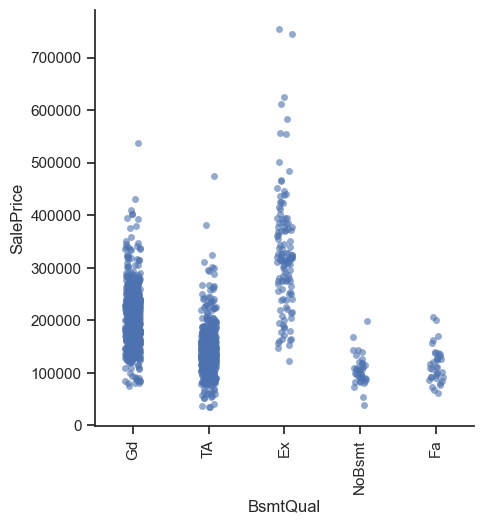

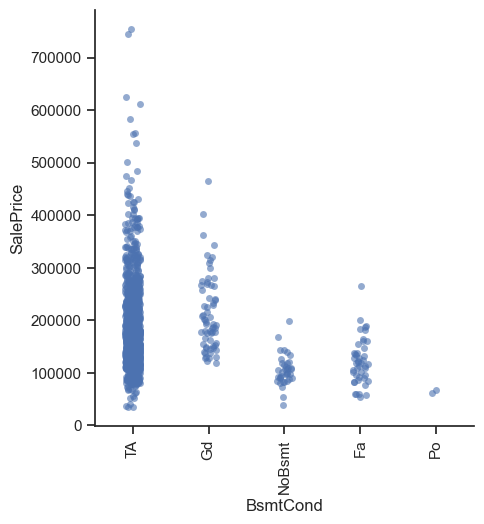

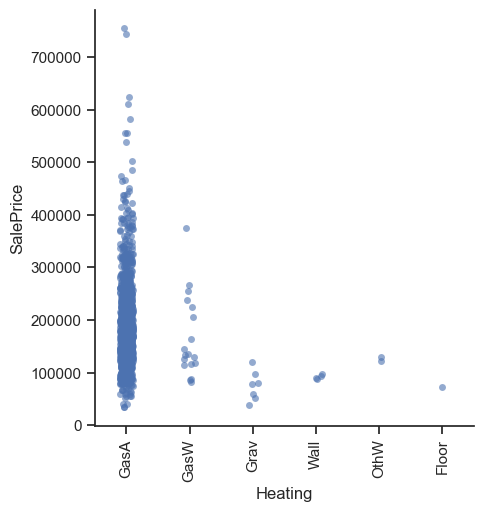

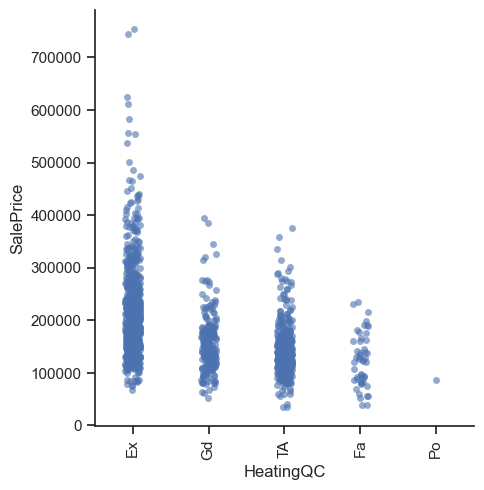

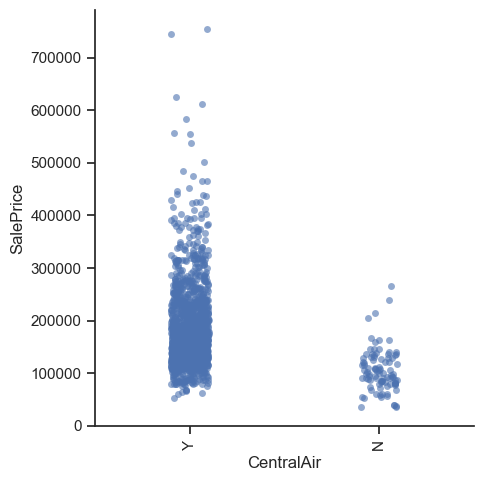

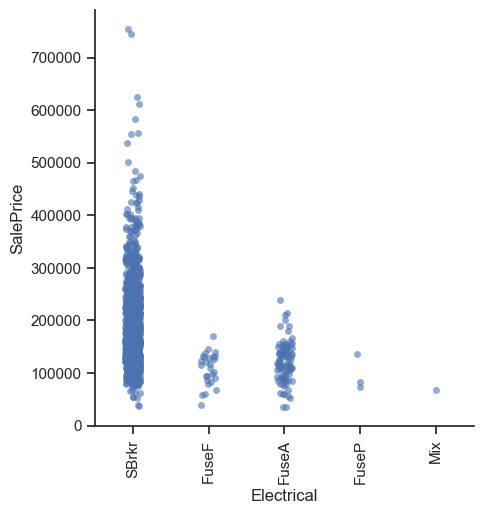

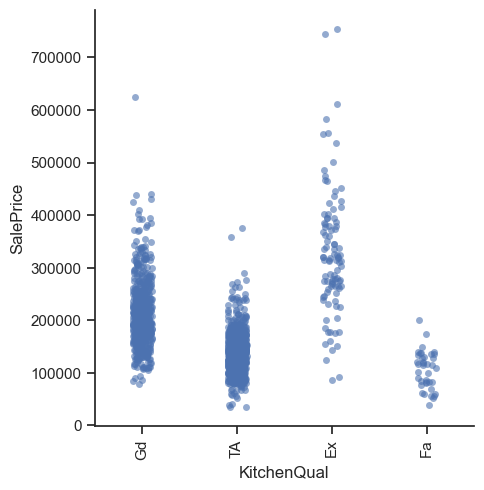

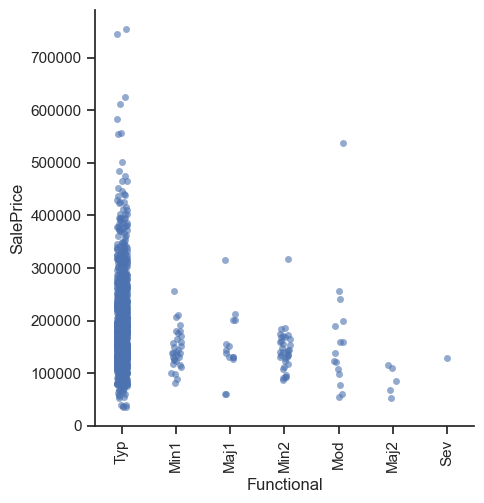

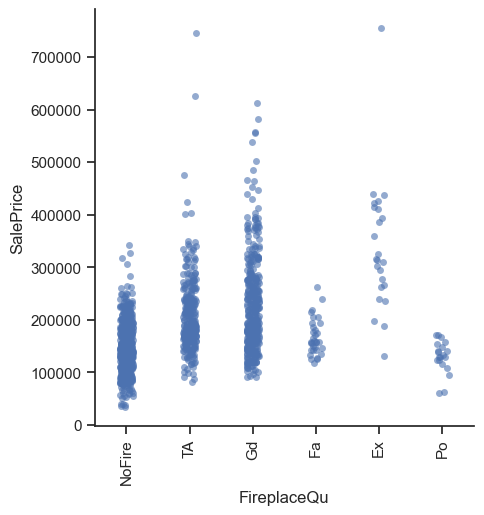

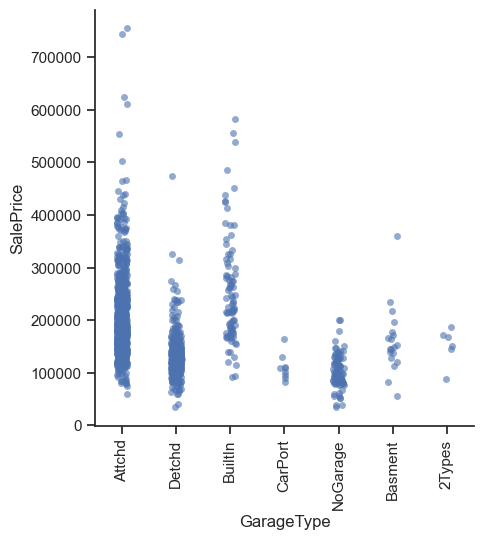

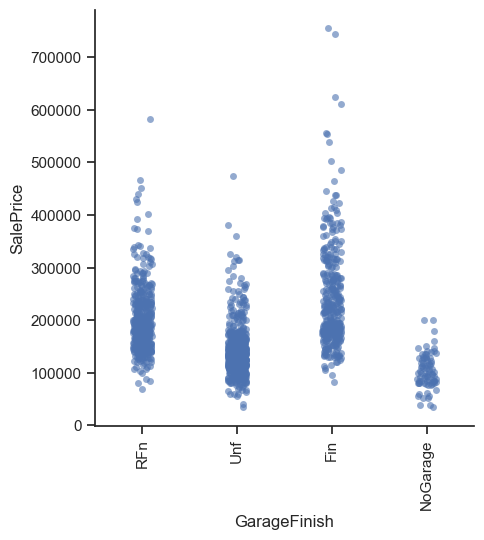

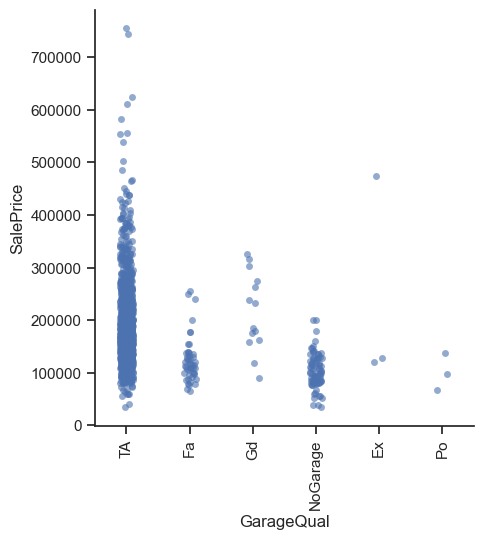

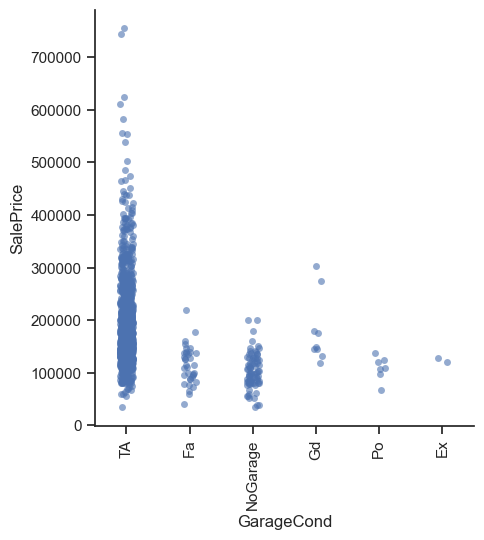

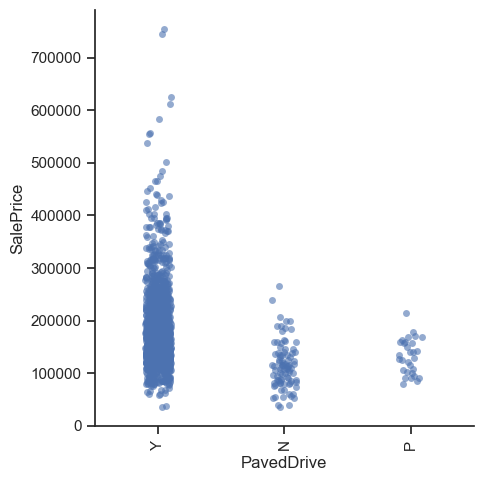

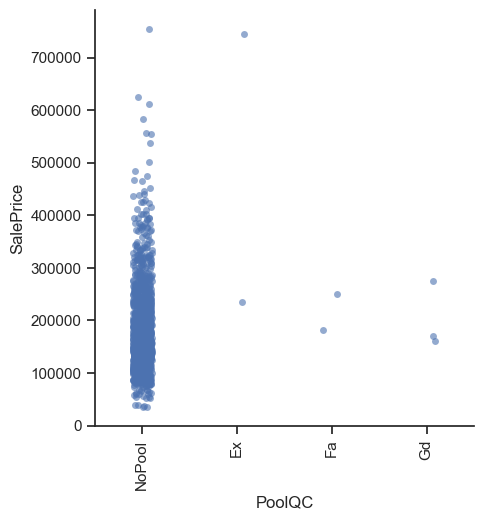

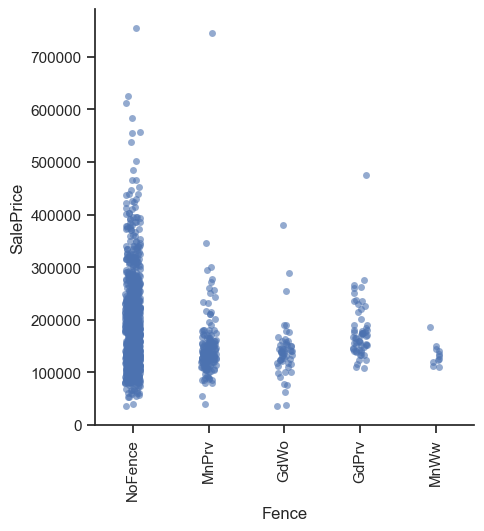

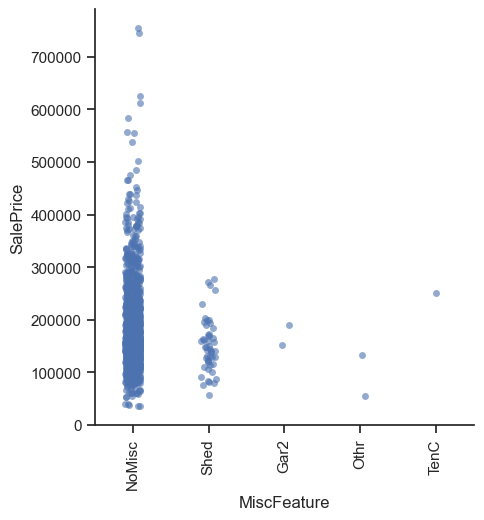

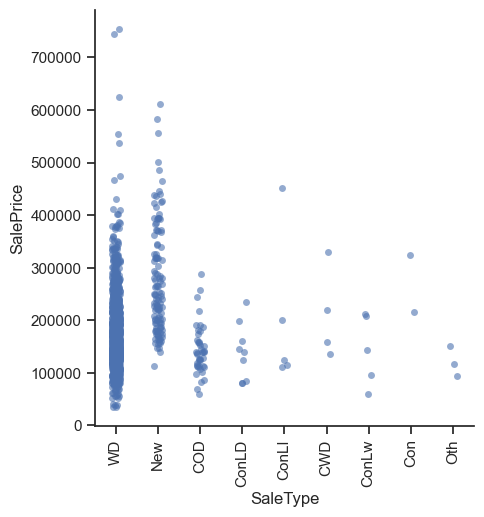

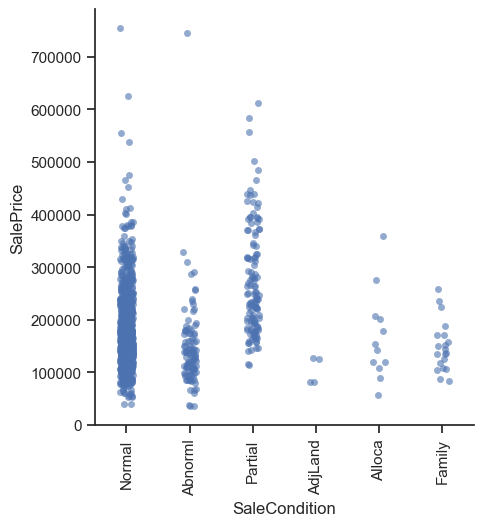

In [86]:
### one-way plots - categorical
for var in ['MSSubClass', 'MSZoning',  'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 
            'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 
            'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond', 
            'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
            'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']:
    g = sns.catplot(data=train, x=var, y='SalePrice', alpha=0.6)
    g.set_xticklabels(rotation=90)

## removed categorical variables that didn't seem predictive (at least not on its own):
## 'Street', 'Alley','LandSlope', 'Utilities', 'Condition1', 'Condition2', 'RoofMatl','BsmtExposure', 
## 'BsmtFinType1', 'BsmtFinType2', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Heating', 'HeatingQC',
## 'Functional', 'PoolQC', 'MiscFeature', 


## ideas for feature engineering
## overall quality - group <4
## house style - create column for unfinished vs finished
## SaleType - new or old

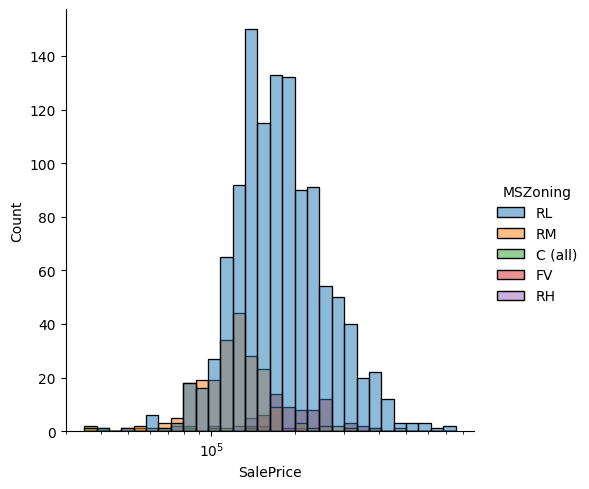

In [14]:
### histogram of sale price
## Sale price, split by MSZone  
g=sns.displot(data=train, x='SalePrice', hue='MSZoning', bins=30, log_scale=True)

[None]

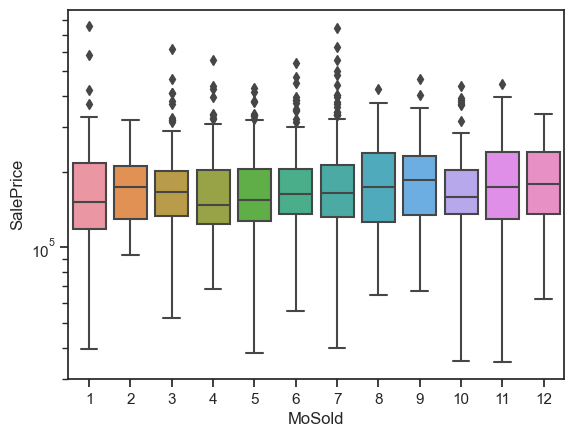

In [47]:
### seasonality?
g=sns.boxplot(data=train, x='MoSold', y='SalePrice')
g.set(yscale='log')

C:\Users\steph\AppData\Local\Temp\ipykernel_20060\3813692613.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


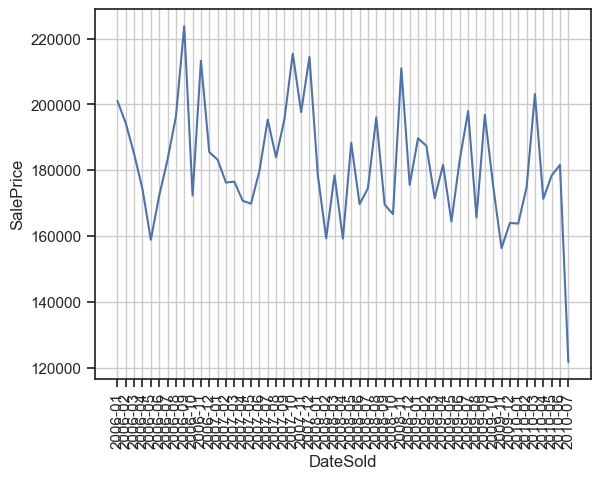

In [62]:
### seasonality?
train['DateSold'] = train['YrSold'].astype(str) + '-' + train['MoSold'].astype(str).str.zfill(2)
datesold_mean = train.groupby('DateSold').SalePrice.mean().to_frame()

g=sns.lineplot(data=datesold_mean, x='DateSold', y='SalePrice')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.grid()
None

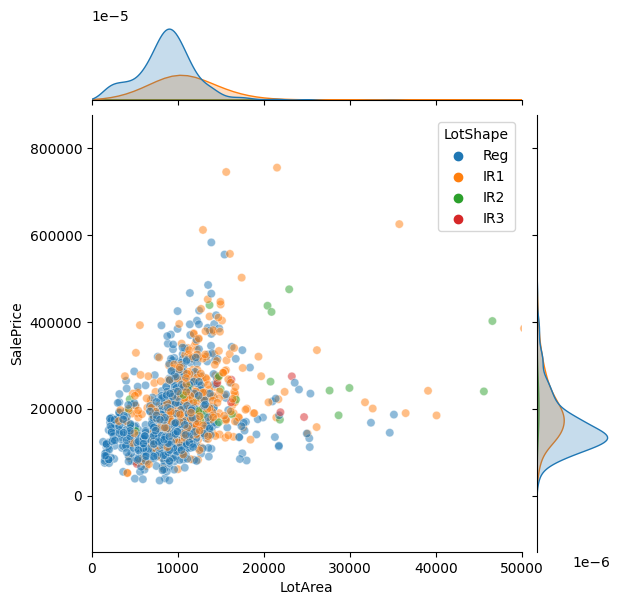

In [28]:
### multivariate views
g=sns.jointplot(data=train,x='LotArea',y='SalePrice',hue='LotShape',xlim=(0,50000),alpha=0.5)

In [5]:
## correlation plots between continuous
## kramers v for relationship between categorical

